Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking
using StatsFuns, Optim, Turing, Flux.Tracker

Turing.setadbackend(:reverse_diff)

loaded


┌ Warning: Package Turing does not have CmdStan in its dependencies:
│ - If you have Turing checked out for development and have
│   added CmdStan as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Turing
│ Loading CmdStan into Turing from project dependency, future warnings for Turing are suppressed.
└ @ nothing nothing:840


:reverse_diff

### snippet 2.8t

Define the data

In [2]:
k = 6; n = 9;

Define the model

In [3]:
@model globe_toss(n, k) = begin
  theta ~ Beta(1, 1) # prior
  k ~ Binomial(n, theta) # model
  return k, theta
end;

Compute the "maximum_a_posteriori" value

Set search bounds

In [4]:
lb = [0.0]; ub = [1.0];

Create (compile) the model

In [5]:
model = globe_toss(n, k);

Compute the maximum_a_posteriori

In [6]:
result = maximum_a_posteriori(model, lb, ub)

Results of Optimization Algorithm
 * Algorithm: Fminbox with L-BFGS
 * Starting Point: [0.8519449399034017]
 * Minimizer: [0.6666666665863572]
 * Minimum: 1.297811e+00
 * Iterations: 3
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 6.17e-08 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 5.95e-14 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 2.49e-09 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 49
 * Gradient Calls: 49

Use Turing mcmc

In [7]:
chn = sample(model, NUTS(1000, 0.65));

┌ Info: [Turing] looking for good initial eps...
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/samplers/support/hmc_core.jl:246
[NUTS{Any}] found initial ϵ: 0.8
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/samplers/support/hmc_core.jl:291
[NUTS] Sampling...  0%  ETA: 1:25:30
  ϵ:         0.8
  α:         0.9642435997768821
4m  pre_cond:  [1.0]┌ Warning: Numerical error has been found in gradients.
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/core/ad.jl:114
┌ Warning: grad = [NaN]
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/core/ad.jl:115
┌ Info:  Adapted ϵ = 0.9635397356352554, std = [1.0]; 500 iterations is used for adaption.
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/samplers/adapt/adapt.jl:91





[NUTS] Finished with
  Running time        = 5.4401143379999874;
  #lf / sample        = 0.005;
  #evals / sample     = 6.939;
  pre-cond. metric    = [1.0].


[NUTS] Sampling...100% Time: 0:00:06


Look at the generated draws (in chn)

In [8]:
describe(chn[:theta])

Summary Stats:
Mean:           0.633588
Minimum:        0.255925
1st Quartile:   0.542856
Median:         0.639576
3rd Quartile:   0.736073
Maximum:        0.939777
Length:         1000
Type:           Float64


Look at hpd region

In [9]:
MCMCChain.hpd(chn[:theta], alpha=0.945) |> display

2-element Array{Float64,1}:
 0.6797033967317547
 0.6945696249153539

analytical calculation

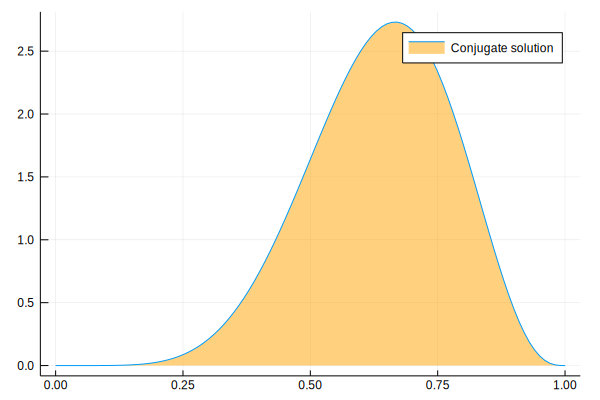

In [10]:
w = 6
n = 9
x = 0:0.01:1
plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), fill=(0, .5,:orange), lab="Conjugate solution")

quadratic approximation

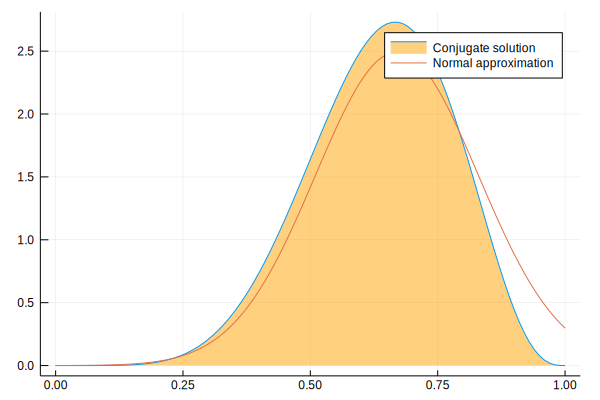

In [11]:
plot!( x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")

Turing Chain

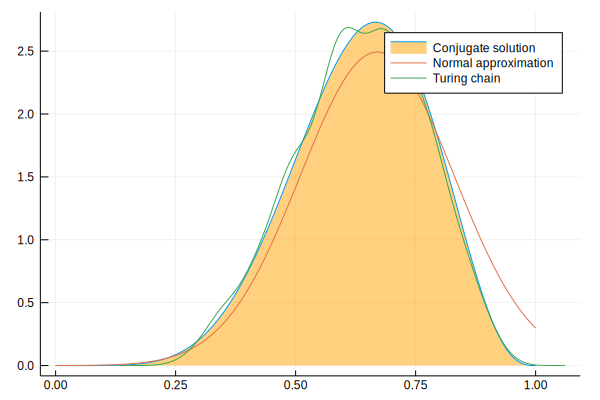

In [12]:
density!(chn[:theta], lab="Turing chain")

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*